## Import data

In [13]:
import pandas as pd # pyright: ignore[reportMissingModuleSource]

df = pd.read_csv("data.csv", sep=";")
print(df.shape)  # dimensions
print(df.info())  # types and missing values
print(df.head())  # 5 first lines

(55074, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55074 entries, 0 to 55073
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email       55074 non-null  object
 1   EMG1        55074 non-null  int64 
 2   EMG2        55074 non-null  int64 
 3   EMG3        55074 non-null  int64 
 4   EMG4        55074 non-null  int64 
 5   EMG5        55074 non-null  int64 
 6   EMG6        55074 non-null  int64 
 7   EMG7        55074 non-null  int64 
 8   EMG8        55074 non-null  int64 
 9   Framecount  55074 non-null  int64 
 10  gesture     55074 non-null  object
 11  SessionID   55074 non-null  object
 12  Timestamp   55074 non-null  object
dtypes: int64(9), object(4)
memory usage: 5.5+ MB
None
       Email  EMG1  EMG2  EMG3  EMG4  EMG5  EMG6  EMG7  EMG8  Framecount  \
0  anonymous    -7     5    -6    -8    -4    -1    10    16           2   
1  anonymous   -14    -3     0     0     7     4   -20    -2           2

## Clean data
### Keep only usefull data

In [14]:
emg_cols = ['EMG1', 'EMG2', 'EMG3', 'EMG4', 'EMG5', 'EMG6', 'EMG7', 'EMG8']
df = df[emg_cols + ['gesture']]

### Manage missing data

In [15]:
df = df.drop_duplicates()  # remove duplicate rows
df = df.dropna() # remove rows with missing values

### Standardize data

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # pyright: ignore[reportMissingModuleSource]

def standardize_data(df, emg_cols):
    """
    Standardizes the EMG columns in the DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame containing EMG data.
    emg_cols (list): List of EMG column names to standardize.
    
    Returns:
    DataFrame: A new DataFrame with standardized EMG columns.
    """
    scaler = StandardScaler()
    return scaler.fit_transform(df[emg_cols])

standard_data = standardize_data(df.copy(), emg_cols)
print("Standardized EMG columns:")
print(standard_data[:5])

Standardized EMG columns:
[[-0.1212221   0.21801581 -0.40109931 -0.20854886 -0.46287357 -0.01783209
   1.03947328  1.44680845]
 [-0.62566226 -0.10611603  0.07844139  0.61242867  1.19953188  0.75029789
  -1.66908265 -0.09325144]
 [ 0.45528093 -0.10611603  0.23828829  0.2019399  -2.12527902 -1.86134405
   0.04633611  0.33454297]
 [ 0.59940669 -0.02508307  0.79775244  1.33078401  1.19953188  0.13579391
   0.4074769   0.33454297]
 [ 0.31115517  1.06886189  0.71782899  0.50980648 -0.91625687 -0.01783209
   1.12975848  0.84789627]]


### Label Encoding

In [17]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['gesture'])
print("\nEncoded labels:")
print(df[['label', 'gesture']].drop_duplicates())


Encoded labels:
       label        gesture
0          0           fist
6474       1          pinch
14788      2           rest
26702      3     wrist-back
40248      4  wrist-forward


### Split data

In [18]:
from sklearn.model_selection import train_test_split

# Use the cleaned and prepared dataframe from previous cells
# Separate features (X) and labels (y)
X = standard_data
y = df['label']

# 3. Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Artificial Neural Network
### Creating model

In [19]:
from sklearn.neural_network import MLPClassifier

def create_mlp_model(hidden_layer_sizes, activation, alpha, learning_rate_init):
    return MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver='adam',
        alpha=alpha,                                    # L2 regularization
        learning_rate_init=learning_rate_init,
        max_iter=2000,
        validation_fraction=0.2,                        # Use 20% of training data for validation
        early_stopping=True,                            # Stop when validation score stops improving
        n_iter_no_change=50,                            # Stop after 50 iterations without improvement
        random_state=42,
        batch_size='auto'
    )

### Hyperparameter optimization

[I 2025-08-20 11:37:03,454] A new study created in memory with name: no-name-e04365e0-9aca-4c2e-9bb7-2daa376f993c
[I 2025-08-20 11:37:18,491] Trial 0 finished with value: 0.8705912467159674 and parameters: {'hidden_layer_sizes': '64', 'activation': 'tanh', 'alpha': 0.00038665156010189337, 'learning_rate_init': 0.0793482876901499}. Best is trial 0 with value: 0.8705912467159674.
[I 2025-08-20 11:37:28,563] Trial 1 finished with value: 0.8673352080889217 and parameters: {'hidden_layer_sizes': '32', 'activation': 'tanh', 'alpha': 0.04787559903453429, 'learning_rate_init': 0.09374234596909661}. Best is trial 0 with value: 0.8705912467159674.
[I 2025-08-20 11:37:53,098] Trial 2 finished with value: 0.889815033462837 and parameters: {'hidden_layer_sizes': '64', 'activation': 'relu', 'alpha': 0.009076325552238985, 'learning_rate_init': 0.0018342430296978112}. Best is trial 2 with value: 0.889815033462837.
[I 2025-08-20 11:38:26,190] Trial 3 finished with value: 0.8859599021955438 and paramete

Top 5 trials:
        value params_hidden_layer_sizes params_activation  params_alpha  \
10  0.891977                    128-64              relu      0.094861   
11  0.890154                    128-64              relu      0.082120   
2   0.889815                        64              relu      0.009076   
12  0.889476                    128-64              relu      0.099941   
14  0.889242                    128-64              relu      0.094368   

    params_learning_rate_init  
10                   0.001632  
11                   0.001442  
2                    0.001834  
12                   0.001366  
14                   0.003499  


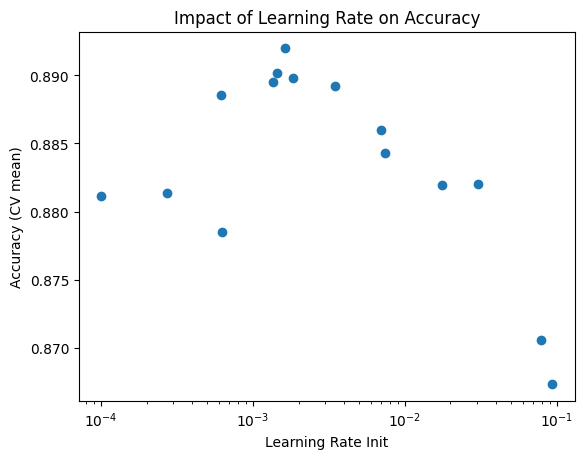

In [20]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import optuna

def objective(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', ['32', '64', '64-32', '128-64'])
    layer_map = {
        '32': (32,),
        '64': (64,),
        '64-32': (64, 32),
        '128-64': (128, 64)
    }
    hidden_layer_sizes = layer_map[hidden_layer_sizes]

    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    alpha = trial.suggest_float('alpha', 1e-4, 1e-1, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-1, log=True)

    mlp = create_mlp_model(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init
    )

    scores = cross_val_score(mlp, X_train, y_train, cv=3, scoring='accuracy')
    return scores.mean()

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

# =========== Results Analysis ===========

# Convert trials to a DataFrame
df_results = study.trials_dataframe()

# Sort by best accuracy
df_sorted = df_results.sort_values('value', ascending=False)
print("Top 5 trials:\n", df_sorted[['value', 'params_hidden_layer_sizes', 
                                    'params_activation', 'params_alpha', 
                                    'params_learning_rate_init']].head())

# Plot accuracy vs learning rate
plt.scatter(df_results['params_learning_rate_init'], df_results['value'])
plt.xscale('log')
plt.xlabel("Learning Rate Init")
plt.ylabel("Accuracy (CV mean)")
plt.title("Impact of Learning Rate on Accuracy")
plt.show()


### Get best parameters

In [33]:
best_params = study.best_trial.params
best_params['hidden_layer_sizes'] = [int(x) for x in best_params['hidden_layer_sizes'].split('-')]
print("Best parameters:", best_params)

Best parameters: {'hidden_layer_sizes': [128, 64], 'activation': 'relu', 'alpha': 0.09486141864934393, 'learning_rate_init': 0.001632038222793669}


## Final Model
### Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import seaborn as sns

def evaluate_model(model, X_val, y_val):
    # Evaluate on validation set
    y_pred = model.predict(X_val)
    print("Validation accuracy:", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
	
    # Cross-validation
    scores = cross_val_score(model, X_val, y_val, cv=5)
    print("Cross-validation scores:", scores)
    print("Mean accuracy:", scores.mean())


    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    

    # ROC Curve
    y_val_bin = label_binarize(y_val, classes=model.classes_)
    probs_full = model.predict_proba(X_val)

    plt.figure()
    for i in range(y_val_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_val_bin[:, i], probs_full[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC Curve")
    plt.legend()
    plt.show()

### Training model

Training improved neural network...
Training completed!
Number of iterations: 87
Final loss: 0.2737

=== IMPROVED NEURAL NETWORK RESULTS ===
Validation accuracy: 0.23155463717029293
              precision    recall  f1-score   support

           0       0.86      0.01      0.01      1009
           1       0.28      0.01      0.02      1282
           2       0.21      1.00      0.35      1691
           3       0.00      0.00      0.00      2009
           4       0.93      0.09      0.16      2236

    accuracy                           0.23      8227
   macro avg       0.46      0.22      0.11      8227
weighted avg       0.45      0.23      0.12      8227



C:\Users\stud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\stud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\stud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Cross-validation scores: [0.87788578 0.86148238 0.88206687 0.8656535  0.88693009]
Mean accuracy: 0.874803724235228


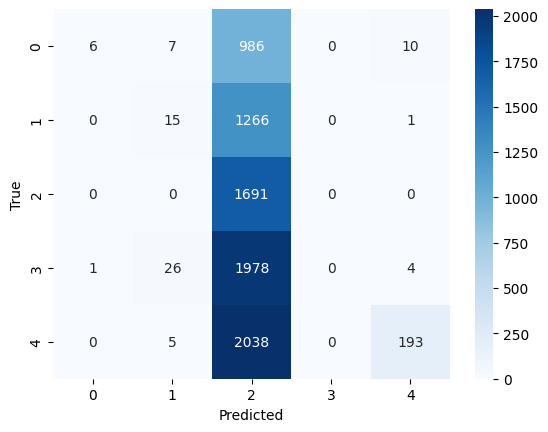

C:\Users\stud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


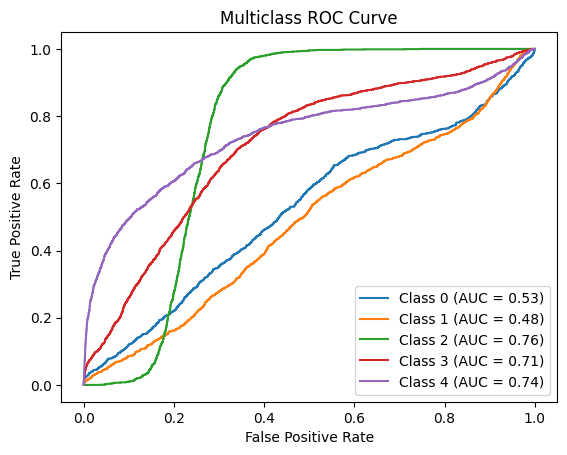


============== Test Accuracy: 0.2377537376929622 ==============
              precision    recall  f1-score   support

           0       0.67      0.00      0.00       989
           1       0.29      0.01      0.02      1229
           2       0.22      1.00      0.36      1745
           3       0.00      0.00      0.00      2070
           4       0.95      0.09      0.17      2194

    accuracy                           0.24      8227
   macro avg       0.43      0.22      0.11      8227
weighted avg       0.42      0.24      0.12      8227



C:\Users\stud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\stud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\stud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

In [35]:
best_mlp = create_mlp_model(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    alpha=best_params['alpha'],
    learning_rate_init=best_params['learning_rate_init'],
)

print("Training improved neural network...")
best_mlp.fit(X_train, y_train)

print("Training completed!")
print(f"Number of iterations: {best_mlp.n_iter_}")
print(f"Final loss: {best_mlp.loss_:.4f}")

# Evaluate the improved model
print("\n=== IMPROVED NEURAL NETWORK RESULTS ===")
evaluate_model(best_mlp, X_val, y_val)

# Evaluate on test set
y_pred = best_mlp.predict(X_test)
print("\n============== Test Accuracy:", accuracy_score(y_test, y_pred), "==============")
print(classification_report(y_test, y_pred))


### Training Pipe

In [ ]:
# train_export.py
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime


FEATURE_NAMES = emg_cols  # Use the original EMG column names
CLASS_NAMES = encoder.classes_.tolist()

df = pd.read_csv("data.csv", sep=";")
df = df.drop_duplicates()  # remove duplicate rows
df = df.dropna() # remove rows with missing values


# Separate features and labels
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['gesture'])
Y = df['label']
X = df[emg_cols]


X_train, X_eval, y_train, y_eval = train_test_split(X, Y, test_size=0.3, random_state=42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", create_mlp_model(
        hidden_layer_sizes=best_params['hidden_layer_sizes'],
        activation=best_params['activation'],
        alpha=best_params['alpha'],
        learning_rate_init=best_params['learning_rate_init'],
    ))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_eval)

InvalidParameterError: The 'hidden_layer_sizes' parameter of MLPClassifier must be an array-like or an int in the range [1, inf). Got '128-64' instead.

### Model export

In [ ]:
import json
import os
import joblib

metrics = {
    "accuracy": float(accuracy_score(y_eval, y_pred)),
    "report": classification_report(y_eval, y_pred, target_names=CLASS_NAMES, output_dict=True),
}

timestamp = datetime.utcnow().strftime("%Y%m%dT%H%M%SZ")
model_dir = f"models/gesture_cls/1.0.0_{timestamp}"
os.makedirs(model_dir, exist_ok=True)

# 1) Save pipeline
joblib.dump(pipe, f"{model_dir}/pipeline.joblib")

# 2) Save config (schema, classes, thresholds, etc.)
config = {
    "feature_names": FEATURE_NAMES,
    "class_names": CLASS_NAMES,
    "top_k": 2,
    "abstain_threshold": 0.6,  # below this max prob => "unknown"
    "random_state": 42,
    "library": {"sklearn": ">=1.2"},
}
with open(f"{model_dir}/config.json", "w") as f:
    json.dump(config, f, indent=2)

# 3) Save metrics
with open(f"{model_dir}/metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("Model exported to:", model_dir)